In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import urllib
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)

616

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7'

In [4]:
# City data List
city_data_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counters
set_count = 1
record_count = 1

# Loop through all cities in the list
for i, city in enumerate(cities):
        
    # Group cities in sets
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL by city
    City_Url = url + "&q=" + urllib.request.pathname2url(city)
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(City_Url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        City_Weather_Req = requests.get(City_Url).json()

        city_lat = City_Weather_Req["coord"]["lat"]
        city_lng = City_Weather_Req["coord"]["lon"]
        city_max_temp = City_Weather_Req["main"]["temp_max"]
        city_humidity = City_Weather_Req["main"]["humidity"]
        city_clouds = City_Weather_Req["clouds"]["all"]
        city_wind = City_Weather_Req["wind"]["speed"]
        city_country = City_Weather_Req["sys"]["country"]
        city_date = City_Weather_Req["dt"]
        
       # Append the City information into city_data list
        city_data_list.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                          
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=ushuaia
Processing Record 2 of Set 1 | humaita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=humaita
Processing Record 3 of Set 1 | jardim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=jardim
Processing Record 4 of Set 1 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | zlobin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=zlobin
Processing Record 6 of Set 1 | strezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=str

Processing Record 2 of Set 2 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=coihaique
Processing Record 3 of Set 2 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=bambous%20virieux
Processing Record 4 of Set 2 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=hobart
Processing Record 5 of Set 2 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=vila%20velha
Processing Record 6 of Set 2 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=ribeira%20grande
Processing Record 7 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=tiksi
Processing Record 8 of Set 2 | hilo
http://api.openweatherma

Processing Record 6 of Set 3 | chitral
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=chitral
Processing Record 7 of Set 3 | ekangala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=ekangala
Processing Record 8 of Set 3 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=arraial%20do%20cabo
Processing Record 9 of Set 3 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=saint-augustin
Processing Record 10 of Set 3 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=port%20lincoln
Processing Record 11 of Set 3 | kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=kamaishi
Processing Record 12 of Set 3 | kilindoni
http:/

Processing Record 10 of Set 4 | anacortes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=anacortes
Processing Record 11 of Set 4 | atbasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=atbasar
Processing Record 12 of Set 4 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=san%20policarpo
Processing Record 13 of Set 4 | owando
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=owando
Processing Record 14 of Set 4 | yaring
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=yaring
Processing Record 15 of Set 4 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=kavieng
Processing Record 16 of Set 4 | fort nelson
http://api.openweathermap.org/data/2

Processing Record 13 of Set 5 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=severo-kurilsk
Processing Record 14 of Set 5 | ron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=ron
Processing Record 15 of Set 5 | arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=arman
Processing Record 16 of Set 5 | marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=marystown
Processing Record 17 of Set 5 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=saskylakh
Processing Record 18 of Set 5 | garissa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=garissa
Processing Record 19 of Set 5 | shu
http://api.openweathermap.org/data/2.5/weather?u

City not found. Skipping...
Processing Record 16 of Set 6 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=ostrovnoy
Processing Record 17 of Set 6 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=portland
Processing Record 18 of Set 6 | patrocinio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=patrocinio
Processing Record 19 of Set 6 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=sisimiut
Processing Record 20 of Set 6 | miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=miri
Processing Record 21 of Set 6 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=san%20patricio
Processing Record 22 of Set 6 | souillac
http:

Processing Record 19 of Set 7 | thilogne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=thilogne
City not found. Skipping...
Processing Record 20 of Set 7 | konya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=konya
Processing Record 21 of Set 7 | baherden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=baherden
Processing Record 22 of Set 7 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=mount%20gambier
Processing Record 23 of Set 7 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=bathsheba
Processing Record 24 of Set 7 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=laguna
Processing Record 25 of Set 7 | nguiu
http://api.o

Processing Record 21 of Set 8 | talcahuano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=talcahuano
Processing Record 22 of Set 8 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=pangnirtung
Processing Record 23 of Set 8 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 8 | saint-denis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=saint-denis
Processing Record 25 of Set 8 | bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=bonthe
Processing Record 26 of Set 8 | shreveport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=shreveport
Processing Record 27 of Set 

Processing Record 24 of Set 9 | rockport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=rockport
Processing Record 25 of Set 9 | isoka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=isoka
Processing Record 26 of Set 9 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=ixtapa
Processing Record 27 of Set 9 | la pintada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=la%20pintada
Processing Record 28 of Set 9 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=tazovskiy
Processing Record 29 of Set 9 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=sao%20jose%20da%20coroa%20grande
Processing Record 30 of Set 9 | perth
http:/

City not found. Skipping...
Processing Record 27 of Set 10 | port pirie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=port%20pirie
Processing Record 28 of Set 10 | mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=mogadishu
Processing Record 29 of Set 10 | wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=wanning
Processing Record 30 of Set 10 | wellington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=wellington
Processing Record 31 of Set 10 | nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=nalut
Processing Record 32 of Set 10 | sayansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=sayansk
Processing Record 33 of Set 10 | bakchar
http:

City not found. Skipping...
Processing Record 29 of Set 11 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=camacha
Processing Record 30 of Set 11 | wakkanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=wakkanai
Processing Record 31 of Set 11 | labrea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=labrea
City not found. Skipping...
Processing Record 32 of Set 11 | maningrida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=maningrida
Processing Record 33 of Set 11 | tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=tual
Processing Record 34 of Set 11 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=bandarbeyla
Processing Record 35 of 

Processing Record 33 of Set 12 | krasnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=krasnoye
Processing Record 34 of Set 12 | bazarnyye mataki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=bazarnyye%20mataki
Processing Record 35 of Set 12 | poronaysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=poronaysk
Processing Record 36 of Set 12 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=comodoro%20rivadavia
Processing Record 37 of Set 12 | nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=nome
Processing Record 38 of Set 12 | gravelbourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23efdd87f8af7575177bdb973bf751a7&q=gravelbourg
Processing Record 39 of Set 12 | kaz

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data_list)

# Order fields in the data frame
cloudiness = city_data_pd["Cloudiness"]
country = city_data_pd["Country"]
date = city_data_pd["Date"]
humidity = city_data_pd["Humidity"]
lats = city_data_pd["Lat"]
lngs = city_data_pd["Lng"]
max_temps = city_data_pd["Max Temp"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [6]:
len(city_data_pd)

546

In [7]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,90,AR,1538611200,88,-54.81,-68.31,32.00,18.34
1,humaita,0,AR,1538611200,55,-24.93,-65.37,68.00,3.36
2,jardim,20,BR,1538616344,84,-21.48,-56.15,75.09,7.85
3,zlobin,0,HR,1538614800,45,45.29,14.65,62.60,5.82
4,strezhevoy,0,RU,1538613000,76,60.73,77.60,48.20,11.18


# Latitude vs Temperature Plot¶

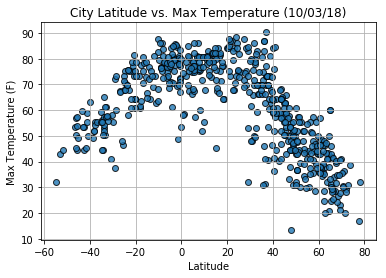

In [8]:
# Scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_Max_temp.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot¶


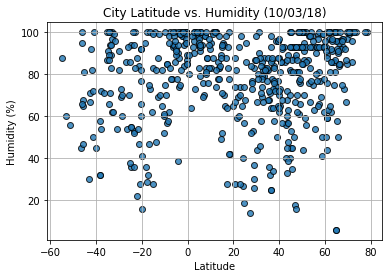

In [9]:
# Scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()


# Latitude vs. Cloudiness Plot¶


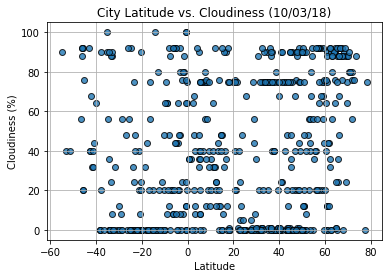

In [10]:
# Scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_Cloudliness.png")

# Show plot
plt.show()


# Latitude vs. Wind Speed Plot¶


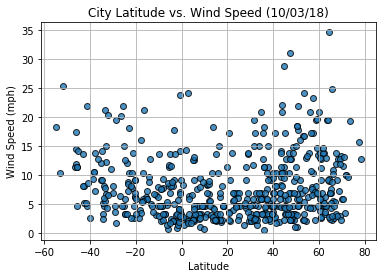

In [11]:
# Scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_windspeed.png")

# Show plot
plt.show()

In [ ]:
#Analysis:
--Observation 1: Near the latitude to zero (Equator) the higher the temparature
--Observation 2: Near the latitude to zero the higher the humidity    
--Observation 3: Northern hemosphire seems to have more winds overall than the southern hemosphire